In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

# Part 1(25%)

In [7]:
df = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
print(df.info())
print(df.isnull().sum()) # There are no null values in any of the columns in the dataframe so no need to handle them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None
Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


In [8]:
# Understanding the dimensions of the dataframe and the columns it contains as well as sample values in each column
print(df.head())
print(df.shape) # 5000 rows and 5 columns
print(df.columns) # all the columns that exist in the dataframe

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  
(5000, 5)
Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')


In [9]:
# Unique values in all columns
print(f"Unique values in the year column: {df['Year'].unique()}")
print(f"Unique values in the major column: {df['Major'].unique()}")
print(f"Unique values in the university column: {df['University'].unique()}")
print(f"Unique values in the time column: {df['Time'].unique()}")
print(f"Unique values in the order column: {df['Order'].unique()}")

Unique values in the year column: ['Year 2' 'Year 3' 'Year 1' 'Year 4']
Unique values in the major column: ['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering']
Unique values in the university column: ['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University']
Unique values in the time column: [12 14 11 15 13 17  9 10 16  8]
Unique values in the order column: ['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'S

Number of first year students: 5
Number of second year students: 2273
Number of third year students: 2719
Number of fourth year students: 3


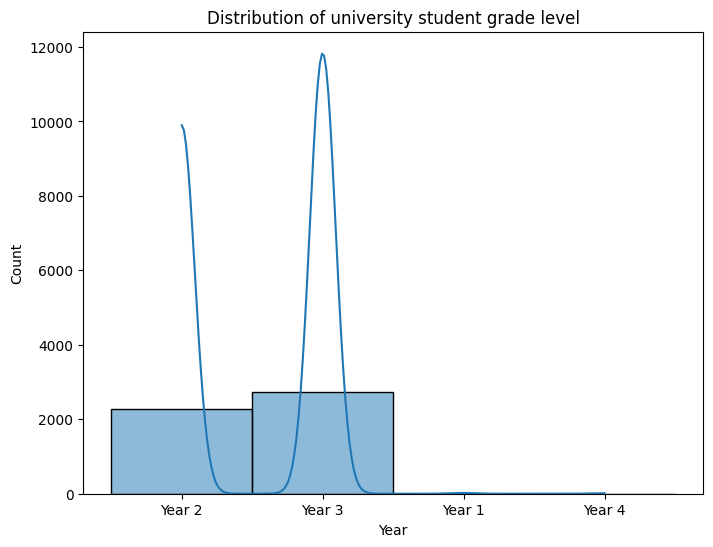

In [10]:
# Number of students by year
print(f"Number of first year students: {len(df[df['Year'] == 'Year 1'])}")
print(f"Number of second year students: {len(df[df['Year'] == 'Year 2'])}")
print(f"Number of third year students: {len(df[df['Year'] == 'Year 3'])}")
print(f"Number of fourth year students: {len(df[df['Year'] == 'Year 4'])}")

# Plottinf the distribution of the students' current year in university
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of university student grade level')
plt.show()

University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: count, dtype: int64


Text(0, 0.5, 'University Name')

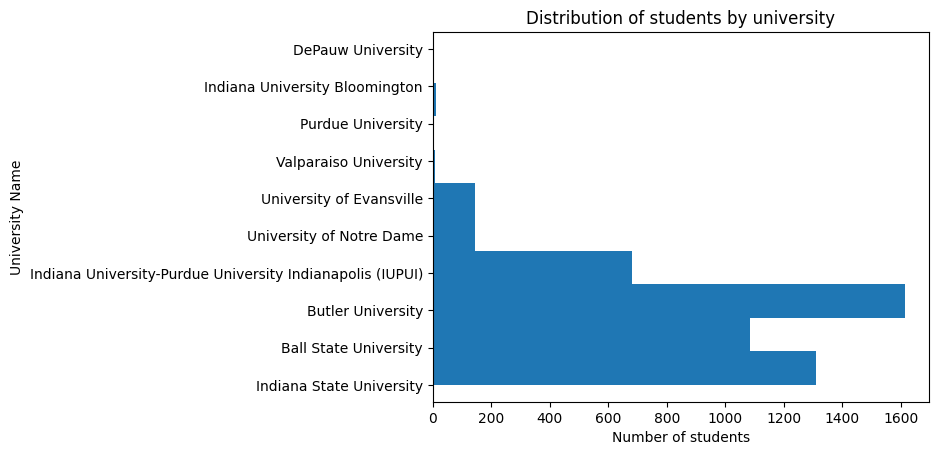

In [11]:
print(df["University"].value_counts()) # understanding how many students in the dataset attend each unique university

# Plotting the distribution of students by university
plt.hist(df["University"], orientation='horizontal')
plt.title("Distribution of students by university")
plt.xlabel("Number of students")
plt.ylabel("University Name")

## Visualizations and findings used
Here are my findings from the exploratory analysis I conducted on the dataset: 
 1. There are 5000 rows and 5 columns in total and none of the columns have any null values that need to be filtered out
 2. The columns contain data about each student's year in university, what major they're pursuing, what university they attend, the time at which they ordered the food(assuming that's what the column is implying), and what they ordered.
 3. The data is primarily about undergraduate students who attend universities in the state of Indiana only. There are very few freshmen and seniors, since the bulk of the data is about sophomores and juniors only constituting about 99.8% of all the data available.
 4. A majority of the students attend Butler University, Ball State University, Indiana State University, with a good number even attending Indiana University-Purdue University Indianapolis. Both Purdue and DePauw have the lowest number of attendes in this dataset at just 1.

## Impactful business use cases
At the same time, one of the most impactful business use cases of this data is to determine what kinds of products they should market and sell considering that they know about their overall audience as well as what their preferences are. Instead of constantly going in the trial and error path with trying to increase sales and popularity, the business will be able to more efficiently determine which products are already in demand and which ones are not, and who their most frequent customers are. This will help them tailor their product lines accordingly, thus able to appeal to customers while also making profits.

## Part 2(30%)

1. Discuss Ethical implications of these factors: One of the biggest ethical implications is that since students' data such as what year they're in, their major, and their university is being used to predict their food orders those students are informed about how exactly their data will be utilized, thus ensuring transparency and mitigating any sort of legal issues. At the same time, if users are not comfortable with their data being utilized they should also be given the opportunity to not provide their information just from a privacy perspective. Another thing to take into account is that even though details about students' race isn't take, there is a chance of bias being introduced, especially through means such as an overwhelming majority being only 2nd and 3rd year students or most being STEM majors or most attending only 1-2 universities out of all the ones in the dataset. It is thus important to make sure that the data, itself is first of all collected in a fair and equitable manner such that it is representative of the college student population in a holistic sense.
2. Discuss Business outcome implications of these factors: If the students are aware of how their data is being utilized and they know for a fact that it is being used in a responsible and ethical manner, then they are able to put trust in the business and will consider coming back to support the business as and when necessary, thus keeping the business booming. At the same time and as mentioned earlier, utilizing AI to make predictions about what students will order can not only result in greater efficiency, but also ensure customer satisfaction since they're able to eat the food that they like, thus resulting in an increased flow of revenue and survive in the ever-competitive food truck market. In another sense, wrong predictions regarding students' orders will not only cause dissatisfaction, but it might even cost the business customers, which is not good for them since they won't be viable anymore.
3. Discuss Technical implications of these factors: As discussed earlier, if the data collected isn't representative of the general undergraduate population in the state of Indiana, it will result in biased predictions being made by the model since the model is trained on biased data and also learns to replicate it in the process. This even applies to representative data but one that isn't processed enough to get rid of any values that may affect the quality of the predictions such as null values. Doing so ensures that the training data is fair, thereby ensuring that the model is able to make generally accurate predictions even with custom input data. Last but not the least, the predictions that the model makes should have some kind of reasoning behind it, one that is usually tied back to patterns and trends discovered in the raw data itself so that if at all customers tend to question the model's responses, they have a justified answer.

# Part 3(35%)

Since we are trying to predict what a student will order based on which year they're in, what major they're pursuing, and even what university they're attending, I chose to split the data with the X components including all the student information, and the Y component including the actual orders that the student got, since that's what the model is trying to predict. As far as the model selection goes, I used SKLearn's K-Nearest Neighbors model for several reasons, one of them being how the data is non-linear and how this problem involves multi-class classification, since there exist more than two labels that have to be taken into account for the prediction to be made.

In [13]:
X, y = df.loc[:, ["Year", "Major", "University"]], df.loc[:, ["Order"]]
# Stratify class labels so that there's an equal distribution in both the training and testing datasets for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3000, 3) (3000, 1)
(2000, 3) (2000, 1)


This is the part after loading in the dataset and splitting it into a training and testing set where the data is being processed in order to be fed into the model. Since the input data that will be utilized to make the order prediction is categorical in nature, they have to be encoded so that the model is able to interpret and work with them in an appropriate manner. I will utilize Scikit-Learn's LabelEncoder for this because of reasons such as it being more memory-efficient and how it doesn't create a separate column of numerical values for each category, which would otherwise have to be taken into account as well to ensure that there's no kind of mismatch. Since the only input columns with categorical data are Year, Major, and University, I will label encode all of them in both the training and testing sets in order to ensure consistency. For training the model, like I mentioned earlier, I will utilize the KNearestNeighbors algorithm because of how the problem involves taking in all possible student data regarding what year they're in, the major they're pursuing, and the university they attend and then predicting, based on some kind of similarity measure with custom data, what they will order. For example, a year 2 student studying Physics at Indiana State University in the dataset orders a Fried Catfish Basket, so using this algorithm will take such a case into account, and if for example, the custom data also includes some other year 2 STEM major at the same university, the algorithm will compare the two data points, generate a similarity score, and then use it to make the prediction. I will begin by experimenting with custom p-values to begin with, while holding other values constant since that's the metric responsible for calculating the distance between data points. In order to them determine the most optimal set of parameters and depending on the model's accuracy score, I will use GridSearchCV which performs an exhaustive search over a set of hyperparameter values for metrics such as number of neighbors, leaf-size, jobs to run in parallel, and weights, etc that I will define, and I will use that to calculate the new accuracy score to get a better sense of which combination of values yield a better result. As far as testing the model goes, I will generate the f1 and precision scores using the classification_report function, in order to get a better sense of the accuracy of the model's positive predictions as well as the number of times the model's predictions fall in the false positive/false negative category. I will also generate a confusion matrix in order to further visualize the number of times the model's predictions matched the actual value and when it did not for all the classes.

In [14]:
# Label encoding the year, major, and university columns to convert them into numerical values so that the model can process them

encoder = LabelEncoder()

X_train["Year"] = encoder.fit_transform(X_train["Year"])
X_train["Major"] = encoder.fit_transform(X_train["Major"])
X_train["University"] = encoder.fit_transform(X_train["University"])

X_test["Year"] = encoder.fit_transform(X_test["Year"])
X_test["Major"] = encoder.fit_transform(X_test["Major"])
X_test["University"] = encoder.fit_transform(X_test["University"])

# experimenting with custom p-value
param_grid_knn = {
    "p": [1,2,3,4],
}

print(f"Experimenting using fixed values for n_neighbors, algorithm, metric, and leaf_size without grid search optimization: ")

for i in range(0, 4):
  p = param_grid_knn["p"][i]
  knn = KNeighborsClassifier(n_neighbors = 40, algorithm= "kd_tree", metric = 'minkowski', p = p, leaf_size=30).fit(X_train, y_train.values.ravel()) # flattens the numpy array to avoid the DataConversionWarning
  y_pred = knn.predict(X_test)
  print(f'Accuracy using p value of {p} : {round((accuracy_score(y_test, y_pred) * 100), 2)}%')

# # performing grid search over all possible metrics to determine the best set of parameters
params = {
    "p": [10,20,30,40,50],
    "algorithm": ['auto', 'brute', 'ball_tree', 'kd_tree'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [10,20,30,40],
    "leaf_size": [10,20,30,40],
    "n_jobs": [1,2,3,4]
}

gs = GridSearchCV(KNeighborsClassifier(), params, cv=5).fit(X_train, y_train.values.ravel())
print(f"Best parameters: {gs.best_params_}")
print(f"Accuracy using grid search optimization: {(gs.best_score_ * 100)}%")


Experimenting using fixed values for n_neighbors, algorithm, metric, and leaf_size without grid search optimization: 
Accuracy using p value of 1 : 46.35%
Accuracy using p value of 2 : 45.7%
Accuracy using p value of 3 : 45.7%
Accuracy using p value of 4 : 45.7%
Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 40, 'n_jobs': 1, 'n_neighbors': 30, 'p': 10, 'weights': 'distance'}
Accuracy using grid search optimization: 50.96666666666667%


In [15]:
# Testing the original model's performance further
print(classification_report(y_test, y_pred))

                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.50      0.35      0.42       198
                                  Cornbread Hush Puppies       0.46      0.28      0.35       204
                                    Fried Catfish Basket       0.42      0.49      0.45       196
                        Hoosier BBQ Pulled Pork Sandwich       0.40      0.48      0.44       193
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.46      0.28      0.35       198
    Indiana Corn on the Cob (brushed with garlic butter)       0.45      0.80      0.58       198
                                      Indiana Pork Chili       0.59      0.71      0.64       204
                                         Sugar Cream Pie       0.32      0.47      0.38       205
                                      Sweet Potato Fries       0.45      0.27      0.33       203
Ultimate Grilled Ch

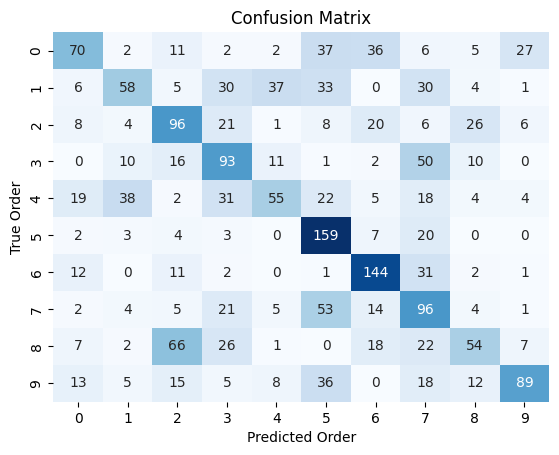

In [16]:
# To visualize how the model performed with regards to order predictions it made vs what the actual orders were 
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Order')
plt.ylabel('True Order')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Pickling the model for future use
pickle.dump(knn, open('knn.pkl', 'wb'), protocol = None, fix_imports=True, buffer_callback=None)

# extracting the model from the pickled file and testing it
saved_knn_model = pickle.load(open('knn.pkl', 'rb'))
saved_knn_model.fit(X_train, y_train.values.ravel())
y_pred_modified = saved_knn_model.predict(X_test)
print(y_pred_modified)

print(accuracy_score(y_test, y_pred_modified))

['Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Indiana Pork Chili' 'Indiana Pork Chili' ...
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Sweet Potato Fries']
0.457


In [21]:
# Running the prediction application
target_mappings = [
    {"Year 1": 0, "year 1": 0, "Year 2": 1, "year 2": 1, "Year 3": 2, "year 3": 2, "Year 4": 3, "year 4": 3},
    {"Mathematics": 12, "mathematics": 12, "Math": 12, "math": 12,
     "Astronomy": 2, "astronomy": 2,
     "Biology": 3, "biology": 3,
     "Chemistry": 5, "chemistry": 5,
     "Finance": 8, "finance": 8,
     "Physics": 16, "physics": 16,
     "Business Administration": 4, "business administration": 4,
     "Economics": 7, "economics": 7,
     "Accounting": 0, "accounting": 0,
     "Sociology": 19, "sociology": 19,
     "Political Science": 17, "political science": 17,
     "Marketing": 11, "marketing": 11,
     "Psychology": 18, "psychology": 18,
     "Anthropology": 1, "anthropology": 1,
     "International Business": 10, "international business": 10,
     "Music": 14, "music": 14,
     "Mechanical Engineering": 13, "mechanical engineering": 13,
     "Fine Arts": 9, "fine arts": 9,
     "Civil Engineering": 6, "civil engineering": 6,
     "Philosophy": 15, "philosophy": 15
    },
    {'Indiana State': 3, 'indiana state': 3,
     'Ball State': 0, 'ball state': 0,
     'Butler': 1, 'butler': 1,
     'Notre Dame': 8, 'notre dame': 8,
     'IUPUI': 5, 'iupui': 5,
     'Evansville': 7, 'evansville': 7,
     'Indiana Bloomington': 4, 'indiana bloomington': 4,
     'DePauw': 2, 'depauw': 2,
     'Purdue': 6, 'purdue': 6,
     'Valparaiso': 9, 'valparaiso': 9,
    }
]

valid_universities = ['Indiana State', 'indiana state', 'Ball State', 'ball state', 'Butler', 'butler', 'Notre Dame', 'notre dame', 'IUPUI', 'iupui', 'Evansville', 'evansville', 'Indiana Bloomington', 'indiana bloomington','DePauw', 'depauw', 'Purdue', 'purdue', 'Valparaiso', 'valparaiso']

valid_majors = ['Mathematics', 'mathematics', 'Math', 'math', 'Astronomy', 'astronomy', 'Biology', 'biology','Chemistry', 'chemistry', 'Finance', 'finance', 'Physics', 'physics', 'Business Administration', 'business administration','Economics', 'economics', 'Accounting', 'accounting', 'Sociology', 'sociology', 'Political Science', 'political science', 'Marketing', 'marketing', 'Psychology', 'psychology', 'Anthropology', 'anthropology', 'International Business', 'international business', 'Music', 'music', 'Mechanical Engineering', 'mechanical engineering', 'Fine Arts', 'fine arts', 'Civil Engineering', 'civil engineering', 'Philosophy', 'philosophy']

main_application, num_predictions = False, 0

while not main_application:
    user_choice = int(input("What would you like to do?: 1. Make a prediction 2. Exit"))
    if user_choice == 2:
        print("Thank you for using the application.")
        main_application = True
    else:
        sub_application = False
        while not sub_application:
            exit_preference = input("Would you like to return to the main menu?: ") if num_predictions == 0 else input("Would you like to make another prediction or return to the main menu?: ")
            if exit_preference in ["return", "back", "main menu", "Main Menu", "menu", "Menu"]:
                print("Returning back to the main menu..")
                sub_application = True
            else:
                year, major, university = "", "", ""
                while True:
                    year = input("Enter which year of college you\'re in: ")
                    if year.lower() != "year 1" and year.lower() != "year 2" and year.lower() != "year 3" and year.lower() != "year 4":
                        print("Invalid year. Please enter a valid year and try again")
                    else:
                        break
                while True:
                    major = input("Enter which major you are: ")
                    if major not in valid_majors:
                        print(f"Make sure the major you are pursuing is one of the following: {valid_majors}")
                    else:
                        break
                while True:
                    university = input("Which university do you attend?: ")
                    if university not in valid_universities:
                        print(f"Make sure the university you attend is one of the following: {valid_universities}")
                    else:
                        break
                values = {"Year": target_mappings[0][year], "Major": target_mappings[1][major], "University": target_mappings[2][university]}
                year_status = [0, ""]
                if values["Year"] == 0:
                    year_status = [1, "st"]
                elif values["Year"] == 1:
                    year_status = [2, "nd"]
                elif values["Year"] == 2:
                    year_status = [3, "rd"]
                else:
                    year_status = [4, "th"]
                print(f"Based on being a {str(year_status[0]) + year_status[1]} year student, majoring in {major} and attending {university}, You are most likely to order: {knn.predict([[values['Year'], values['Major'], values['University']]])[0]}")
                num_predictions += 1
        
    

Make sure the major you are pursuing is one of the following: ['Mathematics', 'mathematics', 'Math', 'math', 'Astronomy', 'astronomy', 'Biology', 'biology', 'Chemistry', 'chemistry', 'Finance', 'finance', 'Physics', 'physics', 'Business Administration', 'business administration', 'Economics', 'economics', 'Accounting', 'accounting', 'Sociology', 'sociology', 'Political Science', 'political science', 'Marketing', 'marketing', 'Psychology', 'psychology', 'Anthropology', 'anthropology', 'International Business', 'international business', 'Music', 'music', 'Mechanical Engineering', 'mechanical engineering', 'Fine Arts', 'fine arts', 'Civil Engineering', 'civil engineering', 'Philosophy', 'philosophy']
Make sure the university you attend is one of the following: ['Indiana State', 'indiana state', 'Ball State', 'ball state', 'Butler', 'butler', 'Notre Dame', 'notre dame', 'IUPUI', 'iupui', 'Evansville', 'evansville', 'Indiana Bloomington', 'indiana bloomington', 'DePauw', 'depauw', 'Purdue',

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Based on being a 2nd year student, majoring in astronomy and attending indiana state, You are most likely to order: Sweet Potato Fries


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Based on being a 3rd year student, majoring in math and attending ball state, You are most likely to order: Indiana Corn on the Cob (brushed with garlic butter)
Returning back to the main menu..
Thank you for using the application.


# Part 4(10%)

There are several considerations that would need to be made for this solution that is aimed at predicting food orders based on students' grade year, their major, and which university they attend such as evaluating model performance metrics like the accuracy score, precision score, and f1 recall score in order to ensure a relatively high level of accuracy, as well as customer satisfaction. The model should also be able to generalize to unseen data and be scalable since there's a possibility that demand will go up and the model having to be trained on a larger dataset. At the same time, user's privacy concerns need to be taken into account before releasing this solution since not everyone may want their data accessible by parties who they don't know a lot about, and even if there are no specific user concerns, care should be taken to ensure that all users are made aware about how their data will be utilized. It is also important to design the model so that it can be continuously improved, for example, with regards to accomodating different user preferences or even business needs, which is why in the first place, it is important to design the model in such a way that it is able to handle different variations in user input.